<a href="https://colab.research.google.com/github/jellydaniellie/cs6501-project/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

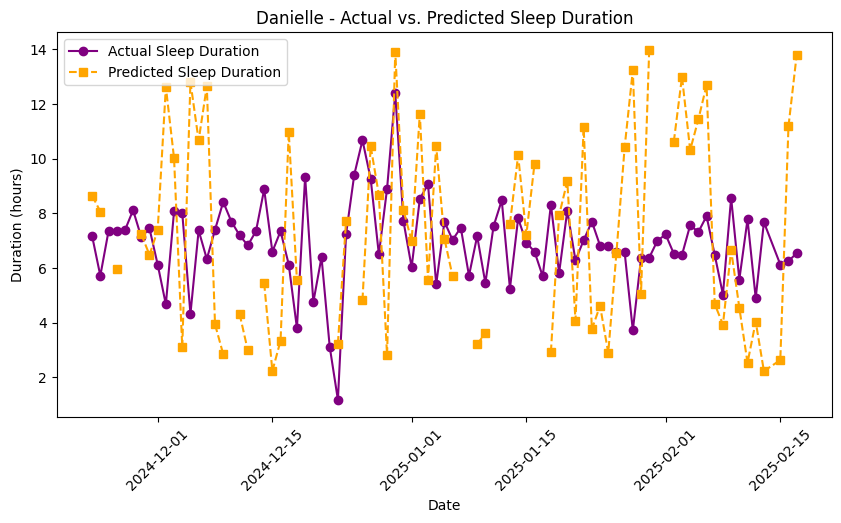

In [25]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sleep_predictions (3).csv')
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep Duration (hours)'], marker='o', label="Actual Sleep Duration",color='purple')
plt.plot(df['Date'], df['Predicted Sleep Duration (hrs)'], marker='s', linestyle="dashed", label="Predicted Sleep Duration", color='orange')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.title("Danielle - Actual vs. Predicted Sleep Duration")
plt.legend()
plt.show()

In [26]:

# examine start and end times
df['Sleep Start'] = pd.to_datetime(df['Sleep Start'])
df['Sleep End'] = pd.to_datetime(df['Sleep End'])
df['Sleep Start Hour'] = df['Sleep Start'].dt.hour + df['Sleep Start'].dt.minute / 60
df['Sleep End Hour'] = df['Sleep End'].dt.hour + df['Sleep End'].dt.minute / 60
#
average_start = df['Sleep Start Hour'].mean()
average_end = df['Sleep End Hour'].mean()
print(f'Average Start Time {average_start}') # change formatting
print(f'Average End Time {average_end}')
#


Average Start Time 3.247868217054263
Average End Time 11.061046511627907


In [27]:
# average duration
rolling_avg = df['Sleep Duration (hours)'].rolling(window=7).mean()  # 7-day moving average
print(f'Average Actual Sleep Duration {rolling_avg.mean()}')

rolling_prediction_avg = df['Predicted Sleep Duration (hrs)'].rolling(window=7).mean()  # 7-day moving average
print(f'Average Predicted Sleep Duration {rolling_prediction_avg.mean()}')
#

Average Actual Sleep Duration 6.953839285714284
Average Predicted Sleep Duration 7.392433862433864


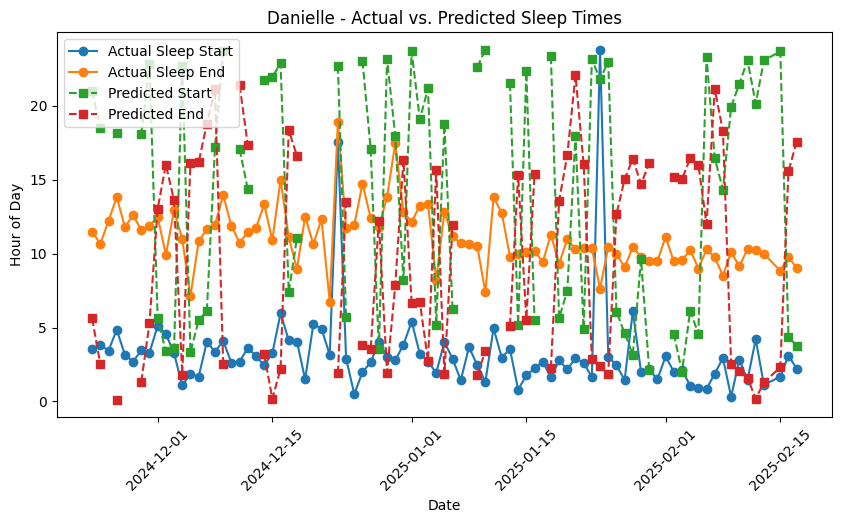

In [28]:
# Convert to datetime
df['Sleep Start'] = pd.to_datetime(df['Sleep Start'])
df['Sleep End'] = pd.to_datetime(df['Sleep End'])
df['Predicted Sleep Start'] = pd.to_datetime(df['Predicted Sleep Start'], errors='coerce')
df['Predicted Sleep End'] = pd.to_datetime(df['Predicted Sleep End'], errors='coerce')

# Extract hours
df['Sleep Start Hour'] = df['Sleep Start'].dt.hour + df['Sleep Start'].dt.minute / 60
df['Sleep End Hour'] = df['Sleep End'].dt.hour + df['Sleep End'].dt.minute / 60
df['Predicted Start Hour'] = df['Predicted Sleep Start'].dt.hour + df['Predicted Sleep Start'].dt.minute / 60
df['Predicted End Hour'] = df['Predicted Sleep End'].dt.hour + df['Predicted Sleep End'].dt.minute / 60

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep Start Hour'], marker='o', label="Actual Sleep Start")
plt.plot(df['Date'], df['Sleep End Hour'], marker='o', label="Actual Sleep End")
plt.plot(df['Date'], df['Predicted Start Hour'], marker='s', linestyle="dashed", label="Predicted Start")
plt.plot(df['Date'], df['Predicted End Hour'], marker='s', linestyle="dashed", label="Predicted End")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.title("Danielle - Actual vs. Predicted Sleep Times")
plt.legend()
plt.show()


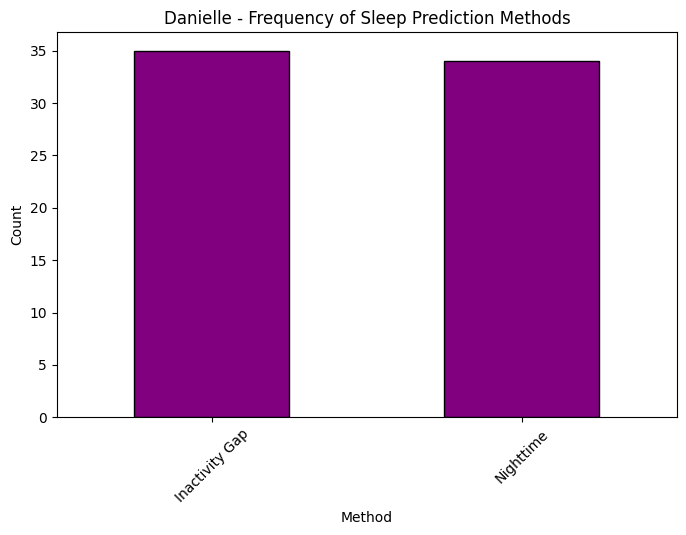

,count
Method,
Inactivity Gap,35
Nighttime,34


In [29]:
# Count occurrences of each method
method_counts = df['Method'].value_counts()

# Plot method distribution
plt.figure(figsize=(8, 5))
method_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Method")
plt.ylabel("Count")
plt.title("Danielle - Frequency of Sleep Prediction Methods")
plt.xticks(rotation=45)
plt.show()

# Display the most common method
method_counts


                count      mean       std   min     25%   50%    75%   max
Method                                                                    
Inactivity Gap   35.0  2.559143  3.555955 -3.84  0.1950  2.31  4.895  9.52
Nighttime        34.0 -1.757059  3.004463 -6.09 -3.9975 -1.87  0.790  4.80


<Figure size 800x500 with 0 Axes>

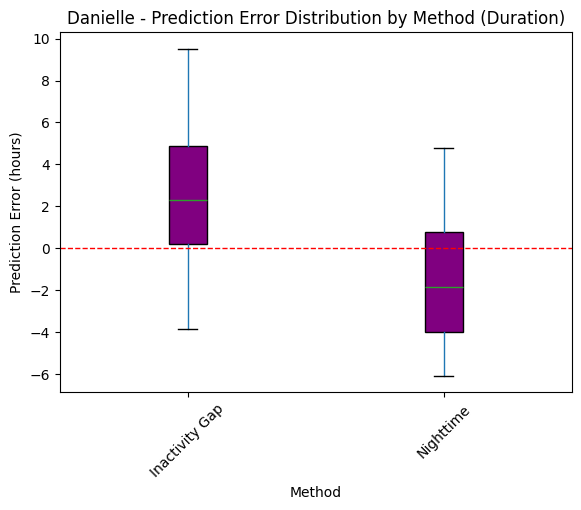

In [30]:

# Compute the prediction error for each method
df['Error (hours)'] = df['Predicted Sleep Duration (hrs)'] - df['Sleep Duration (hours)']

# Group by method and calculate statistics on error
method_error_stats = df.groupby('Method')['Error (hours)'].describe()
print(method_error_stats)

# Boxplot to visualize error distribution per method
# positive median = overestimated duration
# negative median = underestimated duration
# nighttime showed less variability than inactivity gap, but consistently underestimated
plt.figure(figsize=(8, 5))
df.boxplot(column='Error (hours)', by='Method',grid=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))

plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Reference line for perfect prediction
plt.xticks(rotation=45)
plt.xlabel("Method")
plt.ylabel("Prediction Error (hours)")
plt.title("Danielle - Prediction Error Distribution by Method (Duration)")
plt.suptitle("")  # Remove default title
plt.show()


**SHAINA'S DATA**

In [31]:
df_shaina = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sleep_predictions (4).csv')
df_shaina['Date'] = pd.to_datetime(df_shaina['Date'])
df_shaina.head()

,Date,iPhone Sleep Duration (hrs),iPhone Sleep Start,iPhone Sleep End,Predicted Sleep Start,Predicted Sleep End,Predicted Sleep Duration (hrs),Method
0,2025-01-26,9,2025-01-26 01:00:00,2025-01-26 10:00:00,2025-01-27 04:28:59.644978027,2025-01-27 12:28:16.631233887,7.99,Inactivity Gap
1,2025-01-27,5,2025-01-27 02:00:00,2025-01-27 07:00:00,2025-01-28 00:42:19.841422119,2025-01-28 03:31:45.395321045,2.82,Inactivity Gap
2,2025-01-28,7,2025-01-28 01:00:00,2025-01-28 08:00:00,2025-01-29 05:53:45.771650879,2025-01-29 13:51:09.267153076,7.96,Inactivity Gap
3,2025-01-29,6,2025-01-29 02:00:00,2025-01-29 08:00:00,2025-01-29 22:31:59.588900879,2025-01-30 05:31:15.883858887,6.99,Nighttime
4,2025-01-30,7,2025-01-30 02:00:00,2025-01-30 09:00:00,2025-01-30 18:46:09.146314941,2025-01-31 04:08:00.620053955,9.36,Nighttime


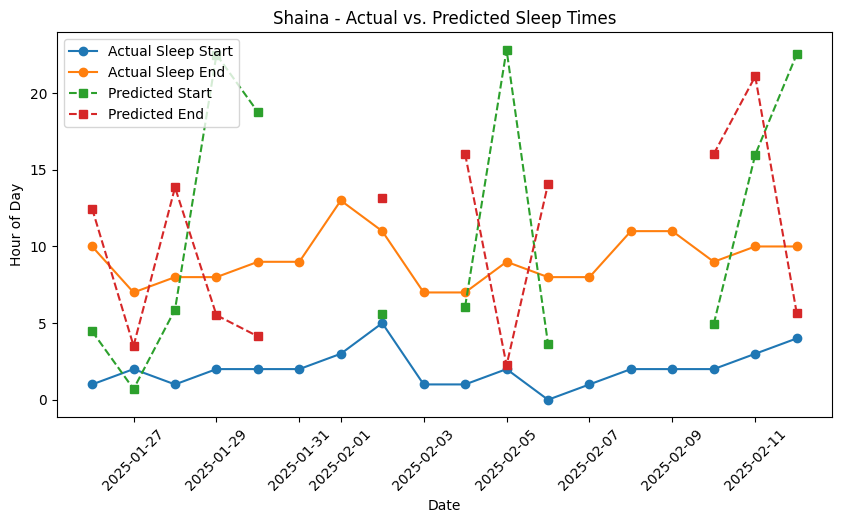

In [32]:
# Convert to datetime
df_shaina['iPhone Sleep Start'] = pd.to_datetime(df_shaina['iPhone Sleep Start'])
df_shaina['iPhone Sleep End'] = pd.to_datetime(df_shaina['iPhone Sleep End'])
df_shaina['Predicted Sleep Start'] = pd.to_datetime(df_shaina['Predicted Sleep Start'], errors='coerce')
df_shaina['Predicted Sleep End'] = pd.to_datetime(df_shaina['Predicted Sleep End'], errors='coerce')

# Extract hours
df_shaina['Sleep Start Hour'] = df_shaina['iPhone Sleep Start'].dt.hour + df_shaina['iPhone Sleep Start'].dt.minute / 60
df_shaina['Sleep End Hour'] = df_shaina['iPhone Sleep End'].dt.hour + df_shaina['iPhone Sleep End'].dt.minute / 60
df_shaina['Predicted Start Hour'] = df_shaina['Predicted Sleep Start'].dt.hour + df_shaina['Predicted Sleep Start'].dt.minute / 60
df_shaina['Predicted End Hour'] = df_shaina['Predicted Sleep End'].dt.hour + df_shaina['Predicted Sleep End'].dt.minute / 60

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_shaina['Date'], df_shaina['Sleep Start Hour'], marker='o', label="Actual Sleep Start")
plt.plot(df_shaina['Date'], df_shaina['Sleep End Hour'], marker='o', label="Actual Sleep End")
plt.plot(df_shaina['Date'], df_shaina['Predicted Start Hour'], marker='s', linestyle="dashed", label="Predicted Start")
plt.plot(df_shaina['Date'], df_shaina['Predicted End Hour'], marker='s', linestyle="dashed", label="Predicted End")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Hour of Day")
plt.title("Shaina - Actual vs. Predicted Sleep Times")
plt.legend()
plt.show()


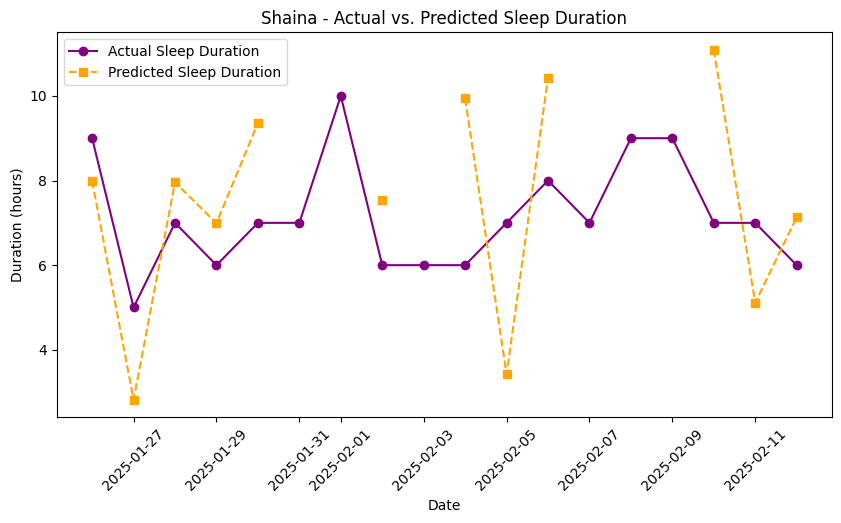

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df_shaina['Date'], df_shaina['iPhone Sleep Duration (hrs)'], marker='o', label="Actual Sleep Duration",color='purple')
plt.plot(df_shaina['Date'], df_shaina['Predicted Sleep Duration (hrs)'], marker='s', linestyle="dashed", label="Predicted Sleep Duration", color='orange')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Duration (hours)")
plt.title("Shaina - Actual vs. Predicted Sleep Duration")
plt.legend()
plt.show()

In [34]:
df_shaina['iPhone Sleep Start'] = pd.to_datetime(df_shaina['iPhone Sleep Start'])
df_shaina['iPhone Sleep End'] = pd.to_datetime(df_shaina['iPhone Sleep End'])
df_shaina['iPhone Sleep Start Hour'] = df_shaina['iPhone Sleep Start'].dt.hour + df_shaina['iPhone Sleep Start'].dt.minute / 60
df_shaina['iPhone Sleep End Hour'] = df_shaina['iPhone Sleep End'].dt.hour + df_shaina['iPhone Sleep End'].dt.minute / 60
#
average_start = df_shaina['iPhone Sleep Start Hour'].mean()
average_end = df_shaina['iPhone Sleep End Hour'].mean()
print(f'Average Start Time {average_start}') # change formatting
print(f'Average End Time {average_end}')
#
df_shaina['Predicted Sleep Start'] = pd.to_datetime(df_shaina['Predicted Sleep Start'],errors='coerce')
df_shaina['Predicted Sleep End'] = pd.to_datetime(df_shaina['Predicted Sleep End'],errors='coerce')
df_shaina['Predicted Sleep Start Hour'] = df_shaina['Predicted Sleep Start'].dt.hour + df_shaina['Predicted Sleep Start'].dt.minute / 60
df_shaina['Predicted Sleep End Hour'] = df_shaina['Predicted Sleep End'].dt.hour + df_shaina['Predicted Sleep End'].dt.minute / 60
#
average_predicted_start = df_shaina['Predicted Sleep Start Hour'].mean()
average_predicted_end = df_shaina['Predicted Sleep End Hour'].mean()
print(f'Average Predicted Start Time {average_predicted_start}') # change formatting
print(f'Average Predicted End Time {average_predicted_end}')
#

Average Start Time 2.0
Average End Time 9.166666666666666
Average Predicted Start Time 11.165277777777776
Average Predicted End Time 10.648611111111112


In [35]:
# average duration
rolling_avg = df_shaina['iPhone Sleep Duration (hrs)'].mean()  # 7-day moving average
print(f'Average Actual Sleep Duration {rolling_avg}')


prediction_avg = df_shaina['Predicted Sleep Duration (hrs)'].mean()  # 7-day moving average
print(f'Average Predicted Sleep Duration {prediction_avg}')
#

Average Actual Sleep Duration 7.166666666666667
Average Predicted Sleep Duration 7.480833333333333


                count      mean       std   min     25%   50%    75%   max
Method                                                                    
Inactivity Gap   35.0  2.559143  3.555955 -3.84  0.1950  2.31  4.895  9.52
Nighttime        34.0 -1.757059  3.004463 -6.09 -3.9975 -1.87  0.790  4.80


<Figure size 800x500 with 0 Axes>

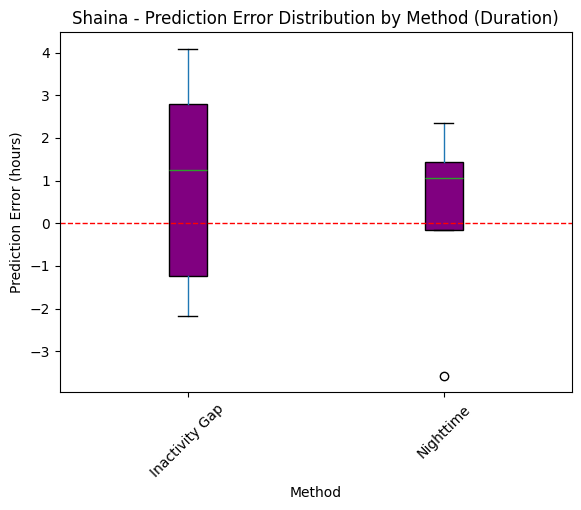

In [36]:
# Compute the prediction error for each method
df_shaina['Error (hours)'] = df_shaina['Predicted Sleep Duration (hrs)'] - df_shaina['iPhone Sleep Duration (hrs)']

# Group by method and calculate statistics on error
method_error_stats = df.groupby('Method')['Error (hours)'].describe()
print(method_error_stats)

# Boxplot to visualize error distribution per method
# positive median = overestimated duration
# negative median = underestimated duration
# nighttime showed less variability than inactivity gap, but consistently underestimated
plt.figure(figsize=(8, 5))
df_shaina.boxplot(column='Error (hours)', by='Method',grid=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))

plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Reference line for perfect prediction
plt.xticks(rotation=45)
plt.xlabel("Method")
plt.ylabel("Prediction Error (hours)")
plt.title("Shaina - Prediction Error Distribution by Method (Duration)")
plt.suptitle("")  # Remove default title
plt.show()

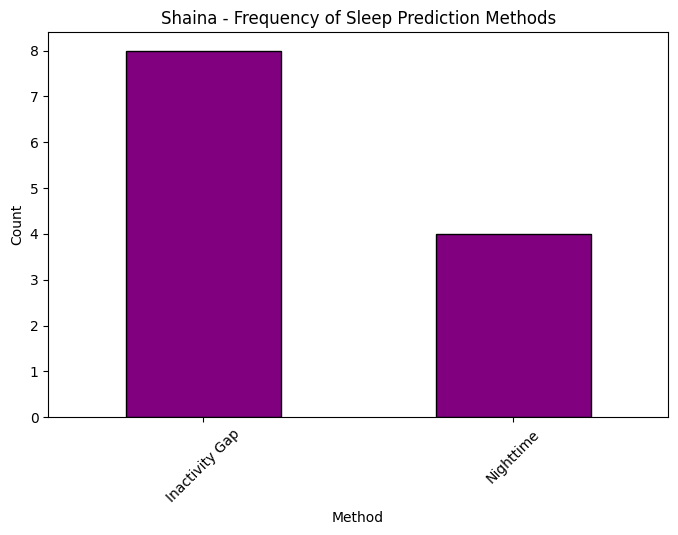

,count
Method,
Inactivity Gap,8
Nighttime,4


In [37]:
# Count occurrences of each method
method_counts = df_shaina['Method'].value_counts()

# Plot method distribution
plt.figure(figsize=(8, 5))
method_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Method")
plt.ylabel("Count")
plt.title("Shaina - Frequency of Sleep Prediction Methods")
plt.xticks(rotation=45)
plt.show()

# Display the most common method
method_counts